<p style="text-align:center;">
<img src="https://github.com/xRiyaPathak/Forest-Forecasters/blob/main/Swan_Teleco.png?raw=true"
     alt="DigitalFuturesLogo"
    width="250" height="250"
     style="float: center; margin-right: 10px;" />
</p>

**<h1 style="text-align: center;">**Swan Teleco**</h1>**
**<h2 style="text-align: center;">Customer Churn</h2>**
**<h3 style="text-align: center;">Forest Forecasters</h3>**
**<h4 style="text-align: center;">Andrew, Hasan, Natalie, Riya</h4>**
**<h5 style="text-align: left;">28-02-2024</h5>**

# Swan

In [1]:
# Import the required libraries!
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

from sklearn import metrics
from time import time

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

import statsmodels.api as sm
import statsmodels.tools 

In [2]:
# Setting display options to show all columns
pd.set_option('display.max_columns', None)

In [3]:
df = pd.read_excel('swan.xlsx')
#df = pd.read_excel('1 - Project Data.xlsx')
df.head()

,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,Senior Citizen,Partner,Dependents,Tenure Months,Phone Service,Multiple Lines,Internet Service,Online Security,Online Backup,Device Protection,Tech Support,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Reason
0,3668-QPYBK,1,United States,California,Los Angeles,90003,"33.964131, -118.272783",33.964131,-118.272783,Male,No,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1,Competitor made better offer
1,9237-HQITU,1,United States,California,Los Angeles,90005,"34.059281, -118.30742",34.059281,-118.307420,Female,No,No,Yes,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1,Moved
2,9305-CDSKC,1,United States,California,Los Angeles,90006,"34.048013, -118.293953",34.048013,-118.293953,Female,No,No,Yes,8,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes,1,Moved
3,7892-POOKP,1,United States,California,Los Angeles,90010,"34.062125, -118.315709",34.062125,-118.315709,Female,No,Yes,Yes,28,Yes,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes,1,Moved
4,0280-XJGEX,1,United States,California,Los Angeles,90015,"34.039224, -118.266293",34.039224,-118.266293,Male,No,No,Yes,49,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,Yes,1,Competitor had better devices


# Data Checks

In [4]:
df.isnull().sum()

CustomerID              0
Count                   0
Country                 0
State                   0
City                    0
Zip Code                0
Lat Long                0
Latitude                0
Longitude               0
Gender                  0
Senior Citizen          0
Partner                 0
Dependents              0
Tenure Months           0
Phone Service           0
Multiple Lines          0
Internet Service        0
Online Security         0
Online Backup           0
Device Protection       0
Tech Support            0
Streaming TV            0
Streaming Movies        0
Contract                0
Paperless Billing       0
Payment Method          0
Monthly Charges         0
Total Charges           0
Churn Label             0
Churn Value             0
Churn Reason         5174
dtype: int64

In [5]:
# Checking the number of rows and columns
df.shape

(7043, 31)

In [6]:
# Checking the columns in the dataset
df.columns

Index(['CustomerID', 'Count', 'Country', 'State', 'City', 'Zip Code',
       'Lat Long', 'Latitude', 'Longitude', 'Gender', 'Senior Citizen',
       'Partner', 'Dependents', 'Tenure Months', 'Phone Service',
       'Multiple Lines', 'Internet Service', 'Online Security',
       'Online Backup', 'Device Protection', 'Tech Support', 'Streaming TV',
       'Streaming Movies', 'Contract', 'Paperless Billing', 'Payment Method',
       'Monthly Charges', 'Total Charges', 'Churn Label', 'Churn Value',
       'Churn Reason'],
      dtype='object')

In [7]:
# Check the data types of all the columns
df.dtypes

CustomerID            object
Count                  int64
Country               object
State                 object
City                  object
Zip Code               int64
Lat Long              object
Latitude             float64
Longitude            float64
Gender                object
Senior Citizen        object
Partner               object
Dependents            object
Tenure Months          int64
Phone Service         object
Multiple Lines        object
Internet Service      object
Online Security       object
Online Backup         object
Device Protection     object
Tech Support          object
Streaming TV          object
Streaming Movies      object
Contract              object
Paperless Billing     object
Payment Method        object
Monthly Charges      float64
Total Charges         object
Churn Label           object
Churn Value            int64
Churn Reason          object
dtype: object

In [8]:
# Checking the unique values for all the columns

for column in df.columns:
    unique_value = df[column].unique()
    print(f"Unique values in '{column}': {unique_value}")

Unique values in 'CustomerID': ['3668-QPYBK' '9237-HQITU' '9305-CDSKC' ... '2234-XADUH' '4801-JZAZL'
 '3186-AJIEK']
Unique values in 'Count': [1]
Unique values in 'Country': ['United States']
Unique values in 'State': ['California']
Unique values in 'City': ['Los Angeles' 'Beverly Hills' 'Huntington Park' ... 'Standish' 'Tulelake'
 'Olympic Valley']
Unique values in 'Zip Code': [90003 90005 90006 ... 96128 96134 96146]
Unique values in 'Lat Long': ['33.964131, -118.272783' '34.059281, -118.30742' '34.048013, -118.293953'
 ... '40.346634, -120.386422' '41.813521, -121.492666'
 '39.191797, -120.212401']
Unique values in 'Latitude': [33.964131 34.059281 34.048013 ... 40.346634 41.813521 39.191797]
Unique values in 'Longitude': [-118.272783 -118.30742  -118.293953 ... -120.386422 -121.492666
 -120.212401]
Unique values in 'Gender': ['Male' 'Female']
Unique values in 'Senior Citizen': ['No' 'Yes']
Unique values in 'Partner': ['No' 'Yes']
Unique values in 'Dependents': ['No' 'Yes']
Unique va

In [9]:
# Checking the unique values for all the columns
df['Churn Reason'].unique()


array(['Competitor made better offer', 'Moved',
       'Competitor had better devices',
       'Competitor offered higher download speeds',
       'Competitor offered more data', 'Price too high',
       'Product dissatisfaction', 'Service dissatisfaction',
       'Lack of self-service on Website', 'Network reliability',
       'Limited range of services',
       'Lack of affordable download/upload speed',
       'Long distance charges', 'Extra data charges', "Don't know",
       'Poor expertise of online support',
       'Poor expertise of phone support', 'Attitude of service provider',
       'Attitude of support person', 'Deceased', nan], dtype=object)

In [10]:
df['Churn Reason'].value_counts()


Churn Reason
Attitude of support person                   192
Competitor offered higher download speeds    189
Competitor offered more data                 162
Don't know                                   154
Competitor made better offer                 140
Attitude of service provider                 135
Competitor had better devices                130
Network reliability                          103
Product dissatisfaction                      102
Price too high                                98
Service dissatisfaction                       89
Lack of self-service on Website               88
Extra data charges                            57
Moved                                         53
Limited range of services                     44
Long distance charges                         44
Lack of affordable download/upload speed      44
Poor expertise of phone support               20
Poor expertise of online support              19
Deceased                                       6
Name: c

In [11]:
## How many customers churned v.s not churned?
df['Churn Value'].value_counts()

Churn Value
0    5174
1    1869
Name: count, dtype: int64

In [12]:
df.head()

,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,Senior Citizen,Partner,Dependents,Tenure Months,Phone Service,Multiple Lines,Internet Service,Online Security,Online Backup,Device Protection,Tech Support,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Reason
0,3668-QPYBK,1,United States,California,Los Angeles,90003,"33.964131, -118.272783",33.964131,-118.272783,Male,No,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1,Competitor made better offer
1,9237-HQITU,1,United States,California,Los Angeles,90005,"34.059281, -118.30742",34.059281,-118.307420,Female,No,No,Yes,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1,Moved
2,9305-CDSKC,1,United States,California,Los Angeles,90006,"34.048013, -118.293953",34.048013,-118.293953,Female,No,No,Yes,8,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes,1,Moved
3,7892-POOKP,1,United States,California,Los Angeles,90010,"34.062125, -118.315709",34.062125,-118.315709,Female,No,Yes,Yes,28,Yes,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes,1,Moved
4,0280-XJGEX,1,United States,California,Los Angeles,90015,"34.039224, -118.266293",34.039224,-118.266293,Male,No,No,Yes,49,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,Yes,1,Competitor had better devices


In [13]:
# Checking the customers who have not churned
filter_condition = (df['Churn Value'] == 0)

nonchurn_data = df.loc[filter_condition, :]
nonchurn_data.head()

,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,Senior Citizen,Partner,Dependents,Tenure Months,Phone Service,Multiple Lines,Internet Service,Online Security,Online Backup,Device Protection,Tech Support,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Reason
1869,7590-VHVEG,1,United States,California,Los Angeles,90001,"33.973616, -118.24902",33.973616,-118.249020,Female,No,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,0,NaN
1870,5575-GNVDE,1,United States,California,Los Angeles,90002,"33.949255, -118.246978",33.949255,-118.246978,Male,No,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No,0,NaN
1871,7795-CFOCW,1,United States,California,Los Angeles,90004,"34.076259, -118.310715",34.076259,-118.310715,Male,No,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,0,NaN
1872,1452-KIOVK,1,United States,California,Los Angeles,90007,"34.027337, -118.28515",34.027337,-118.285150,Male,No,No,Yes,22,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,No,0,NaN
1873,6713-OKOMC,1,United States,California,Los Angeles,90008,"34.008293, -118.346766",34.008293,-118.346766,Female,No,No,No,10,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.9,No,0,NaN


In [14]:
# Checking the customers who have churned
filter_condition = (df['Churn Value'] == 1)

churn_data = df.loc[filter_condition, :]
churn_data.head()

,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,Senior Citizen,Partner,Dependents,Tenure Months,Phone Service,Multiple Lines,Internet Service,Online Security,Online Backup,Device Protection,Tech Support,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Reason
0,3668-QPYBK,1,United States,California,Los Angeles,90003,"33.964131, -118.272783",33.964131,-118.272783,Male,No,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1,Competitor made better offer
1,9237-HQITU,1,United States,California,Los Angeles,90005,"34.059281, -118.30742",34.059281,-118.307420,Female,No,No,Yes,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1,Moved
2,9305-CDSKC,1,United States,California,Los Angeles,90006,"34.048013, -118.293953",34.048013,-118.293953,Female,No,No,Yes,8,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes,1,Moved
3,7892-POOKP,1,United States,California,Los Angeles,90010,"34.062125, -118.315709",34.062125,-118.315709,Female,No,Yes,Yes,28,Yes,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes,1,Moved
4,0280-XJGEX,1,United States,California,Los Angeles,90015,"34.039224, -118.266293",34.039224,-118.266293,Male,No,No,Yes,49,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,Yes,1,Competitor had better devices


In [15]:
# Count for the Churn Reason

unique_value_counts = df['Churn Reason'].value_counts()
unique_value_counts

Churn Reason
Attitude of support person                   192
Competitor offered higher download speeds    189
Competitor offered more data                 162
Don't know                                   154
Competitor made better offer                 140
Attitude of service provider                 135
Competitor had better devices                130
Network reliability                          103
Product dissatisfaction                      102
Price too high                                98
Service dissatisfaction                       89
Lack of self-service on Website               88
Extra data charges                            57
Moved                                         53
Limited range of services                     44
Long distance charges                         44
Lack of affordable download/upload speed      44
Poor expertise of phone support               20
Poor expertise of online support              19
Deceased                                       6
Name: c

In [16]:
# This is df with all the customers who have not yet churned

df_nonchurners = df[df['Churn Reason'].isnull()].copy()
df_nonchurners.head()

,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,Senior Citizen,Partner,Dependents,Tenure Months,Phone Service,Multiple Lines,Internet Service,Online Security,Online Backup,Device Protection,Tech Support,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Reason
1869,7590-VHVEG,1,United States,California,Los Angeles,90001,"33.973616, -118.24902",33.973616,-118.249020,Female,No,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,0,NaN
1870,5575-GNVDE,1,United States,California,Los Angeles,90002,"33.949255, -118.246978",33.949255,-118.246978,Male,No,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No,0,NaN
1871,7795-CFOCW,1,United States,California,Los Angeles,90004,"34.076259, -118.310715",34.076259,-118.310715,Male,No,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,0,NaN
1872,1452-KIOVK,1,United States,California,Los Angeles,90007,"34.027337, -118.28515",34.027337,-118.285150,Male,No,No,Yes,22,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,No,0,NaN
1873,6713-OKOMC,1,United States,California,Los Angeles,90008,"34.008293, -118.346766",34.008293,-118.346766,Female,No,No,No,10,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.9,No,0,NaN


In [17]:
# Shape of df containing customers not churned yet!
df_nonchurners.shape

# Original dataset (7043, 31)

(5174, 31)

In [18]:
# This is df with all the customers who have churned

df_churners = df[df["Churn Value"] == 1]
df_churners.head()

,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,Senior Citizen,Partner,Dependents,Tenure Months,Phone Service,Multiple Lines,Internet Service,Online Security,Online Backup,Device Protection,Tech Support,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Reason
0,3668-QPYBK,1,United States,California,Los Angeles,90003,"33.964131, -118.272783",33.964131,-118.272783,Male,No,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1,Competitor made better offer
1,9237-HQITU,1,United States,California,Los Angeles,90005,"34.059281, -118.30742",34.059281,-118.307420,Female,No,No,Yes,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1,Moved
2,9305-CDSKC,1,United States,California,Los Angeles,90006,"34.048013, -118.293953",34.048013,-118.293953,Female,No,No,Yes,8,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes,1,Moved
3,7892-POOKP,1,United States,California,Los Angeles,90010,"34.062125, -118.315709",34.062125,-118.315709,Female,No,Yes,Yes,28,Yes,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes,1,Moved
4,0280-XJGEX,1,United States,California,Los Angeles,90015,"34.039224, -118.266293",34.039224,-118.266293,Male,No,No,Yes,49,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,Yes,1,Competitor had better devices


In [19]:
# Shape of df containing customers not churned yet!
df_churners.shape
# Original dataset (7043, 31)

(1869, 31)

In [20]:
# Creating a copy of the original df, and work on the copied df

df_backup = df.copy()
df_backup.shape

(7043, 31)

#### Box plot to analyse the Tenure Months

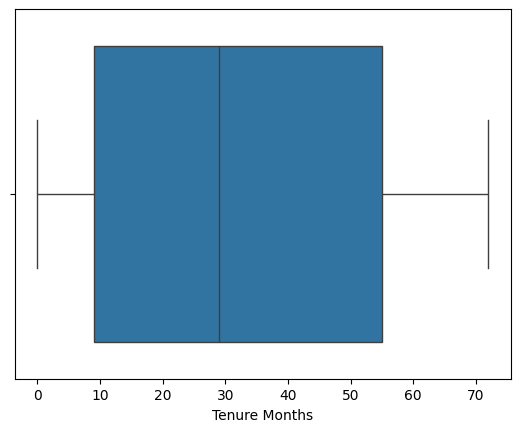

In [21]:
sns.boxplot(data = df, x= 'Tenure Months')
plt.show()

#### Box plot to analyse the Monthly Charges

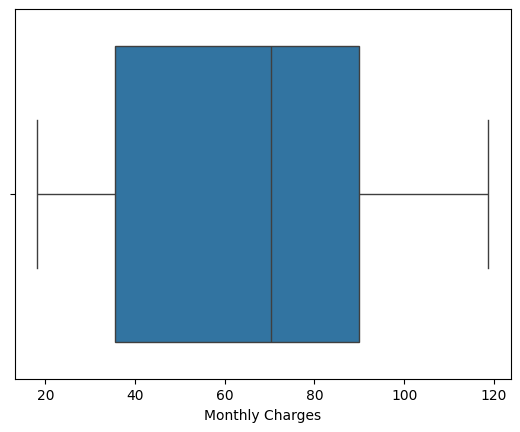

In [22]:
sns.boxplot(data = df, x = 'Monthly Charges')
plt.show()

# Checking for Nulls!

In [23]:
# checking for the missing values
df.isnull().sum()

CustomerID              0
Count                   0
Country                 0
State                   0
City                    0
Zip Code                0
Lat Long                0
Latitude                0
Longitude               0
Gender                  0
Senior Citizen          0
Partner                 0
Dependents              0
Tenure Months           0
Phone Service           0
Multiple Lines          0
Internet Service        0
Online Security         0
Online Backup           0
Device Protection       0
Tech Support            0
Streaming TV            0
Streaming Movies        0
Contract                0
Paperless Billing       0
Payment Method          0
Monthly Charges         0
Total Charges           0
Churn Label             0
Churn Value             0
Churn Reason         5174
dtype: int64

In [24]:
# To fill the null values for customers who did not churn yet
df['Churn Reason'] = df['Churn Reason'].fillna('Not Churned')

In [25]:
# checking for the missing values
df.isnull().sum()

CustomerID           0
Count                0
Country              0
State                0
City                 0
Zip Code             0
Lat Long             0
Latitude             0
Longitude            0
Gender               0
Senior Citizen       0
Partner              0
Dependents           0
Tenure Months        0
Phone Service        0
Multiple Lines       0
Internet Service     0
Online Security      0
Online Backup        0
Device Protection    0
Tech Support         0
Streaming TV         0
Streaming Movies     0
Contract             0
Paperless Billing    0
Payment Method       0
Monthly Charges      0
Total Charges        0
Churn Label          0
Churn Value          0
Churn Reason         0
dtype: int64

# EDA

### Gender distribution of all the customers

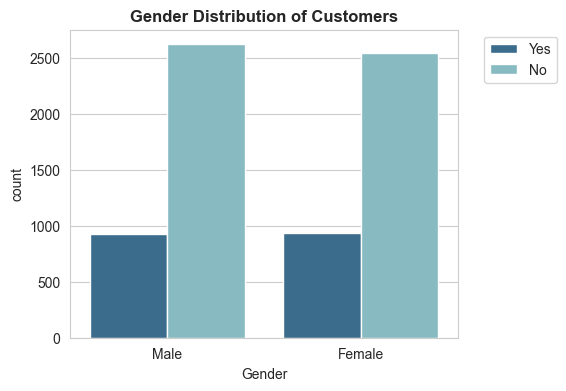

In [158]:
plt.figure(figsize=(5,4), dpi=100)

sns.set_palette(["#2e6f99", "#7EC1CA"])

# Plot gender distribution of customers
sns.countplot(x="Gender", hue="Churn Label", data=df)

# Add title
plt.title("Gender Distribution of Customers", fontweight="bold")

# move legend out of the graph
plt.legend(bbox_to_anchor=(1.05,1))

# Show plot
plt.show()

### Gender distribution of the customers who have churned 

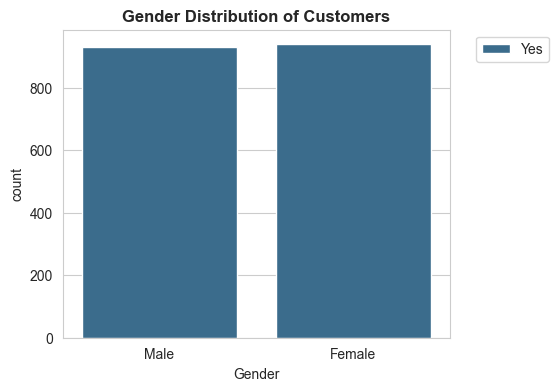

In [157]:
plt.figure(figsize=(5,4), dpi=100)

sns.set_palette(["#2e6f99", "#7EC1CA"])

# Plot gender distribution of customers
sns.countplot(x="Gender", hue="Churn Label", data=df_churners)

# Add title
plt.title("Gender Distribution of Customers", fontweight="bold")

# move legend out of the graph
plt.legend(bbox_to_anchor=(1.05,1))

# Show plot
plt.show()

### Age distribution of customers

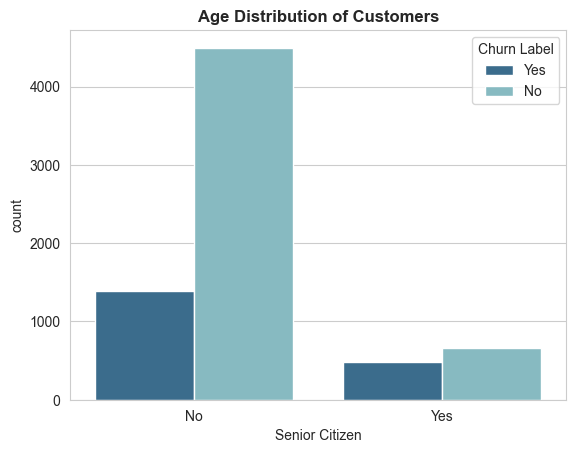

In [155]:
# Gender distribution of customers
sns.set_palette(["#2e6f99", "#7EC1CA"])

# Plot gender distribution of customers
sns.countplot(x="Senior Citizen", hue="Churn Label", data=df)

# Add title
plt.title("Age Distribution of Customers", fontweight="bold")

# Show plot
plt.show()

### Age distribution of customers who have churned

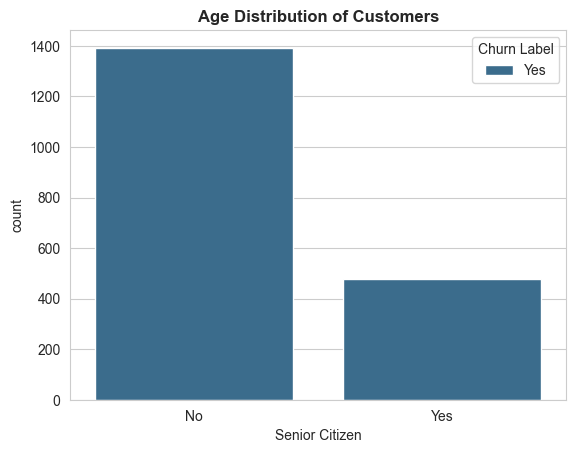

In [156]:
# Gender distribution of customers

sns.set_palette(["#2e6f99", "#7EC1CA"])

# Plot gender distribution of customers
sns.countplot(x="Senior Citizen", hue="Churn Label", data=df_churners)

# Add title
plt.title("Age Distribution of Customers", fontweight="bold")

# Show plot
plt.show()

### Churn Reasons

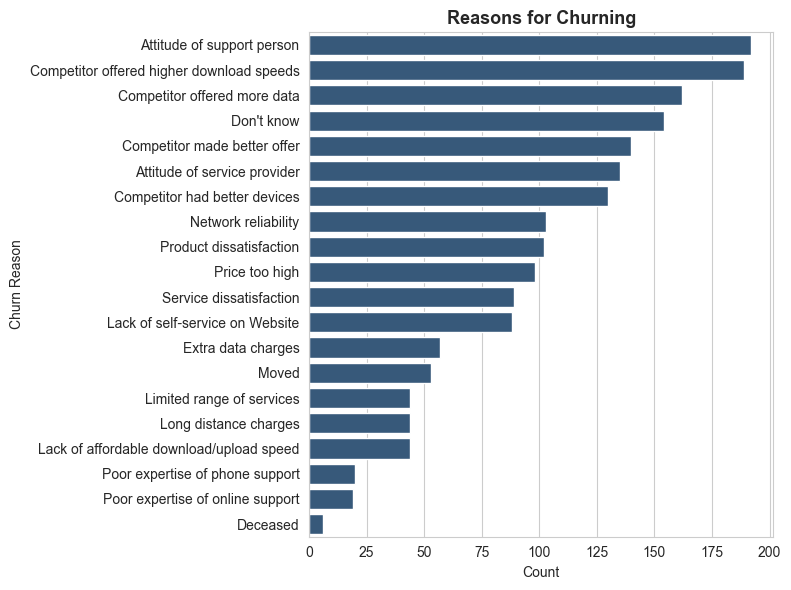

In [188]:
sns.set_style("whitegrid")
sns.set_palette(['#2C5985',  '#347EA1', '#4BA5BA', '#7EC1CA', '#89C8CC', '#95CECF', '#A1D5D2' ,'#AEDCD5','#BCE4D8' ])
fig, ax = plt.subplots(figsize=(8, 6))

sns.countplot(y="Churn Reason", data=df_churners, order=df_churners["Churn Reason"].value_counts().index, ax=ax)
ax.set_xlabel("Count")
ax.set_ylabel("Churn Reason")
ax.set_title("Reasons for Churning", fontweight="bold", fontsize=13)

plt.tight_layout()
plt.show()

### Products used by all the Customers

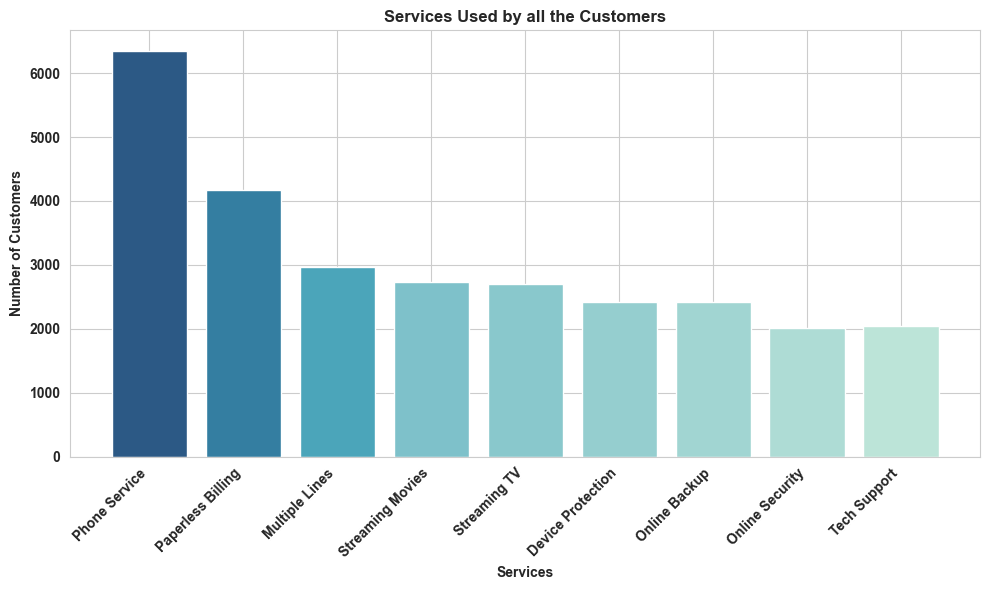

In [161]:
# Products used by the all the Customers
colors = ['#2C5985',  '#347EA1', '#4BA5BA', '#7EC1CA', '#89C8CC', '#95CECF', '#A1D5D2' ,'#AEDCD5','#BCE4D8' ]

services = ['Phone Service', 'Paperless Billing','Multiple Lines', 'Streaming Movies','Streaming TV',  'Device Protection', 'Online Backup',  'Online Security', 'Tech Support']
services_counts = [df[df[services] == 'Yes'].shape[0] for services in services]

plt.figure(figsize=(10, 6))
plt.bar(services, services_counts, color=colors)
plt.yticks(fontweight="bold")
plt.xticks(rotation=45, ha='right',fontweight="bold")
plt.xlabel('Services',fontweight="bold")
plt.ylabel('Number of Customers',fontweight="bold")
plt.title('Services Used by all the Customers',fontweight="bold")
plt.tight_layout()
plt.savefig('product_graph.png')
plt.show()



### Products used by the Churners

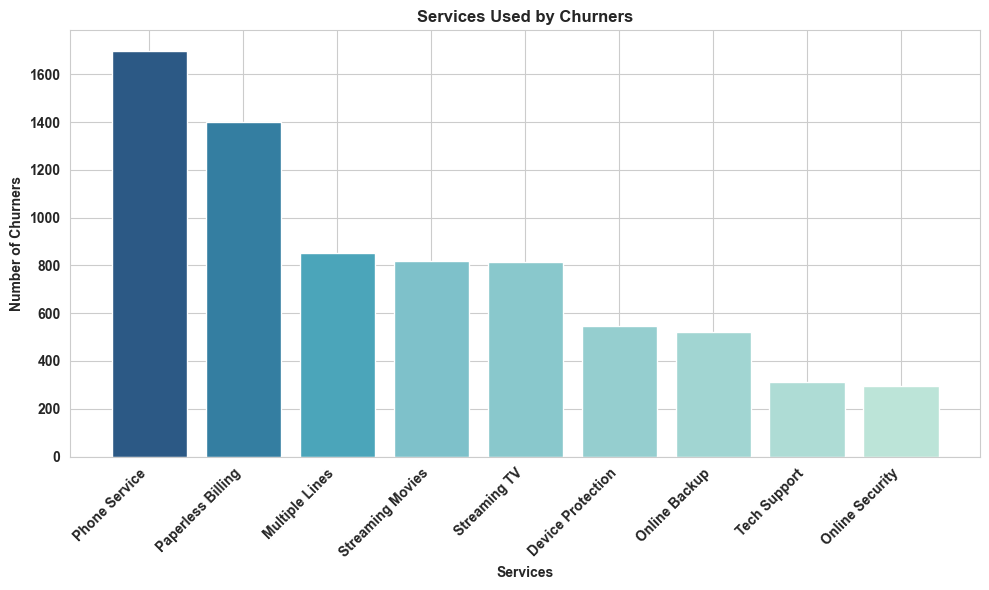

In [196]:
# Products used by the Churners
colors = ['#2C5985',  '#347EA1', '#4BA5BA', '#7EC1CA', '#89C8CC', '#95CECF', '#A1D5D2' ,'#AEDCD5','#BCE4D8' ]

services = ['Phone Service', 'Paperless Billing','Multiple Lines', 'Streaming Movies','Streaming TV',  'Device Protection', 'Online Backup', 'Tech Support',  'Online Security']
services_counts = [df_churners[df_churners[services] == 'Yes'].shape[0] for services in services]

plt.figure(figsize=(10, 6))
plt.bar(services, services_counts, color=colors)
plt.yticks(fontweight="bold")
plt.xticks(rotation=45, ha='right',fontweight="bold")
plt.xlabel('Services',fontweight="bold")
plt.ylabel('Number of Churners',fontweight="bold")
plt.title('Services Used by Churners',fontweight="bold")
plt.tight_layout()
plt.savefig('product_graph.png')
plt.show()



### Family makeup of all the customers

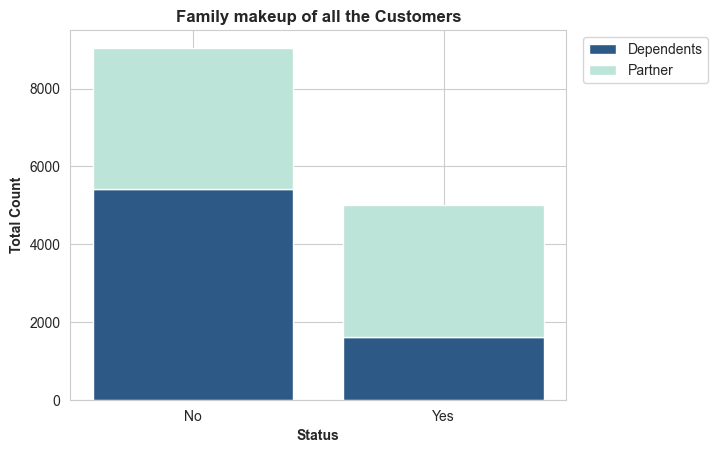

In [165]:
colors = ['#2C5985',  '#BCE4D8']

dependents = df["Dependents"].value_counts()
partner = df["Partner"].value_counts()

fig, ax = plt.subplots()
ax.bar(dependents.index, dependents.values, label="Dependents", color=colors[0])
ax.bar(partner.index, partner.values, bottom=dependents.values, label="Partner", color=colors[1])
ax.set_title("Family makeup of all the Customers",fontweight="bold")
ax.set_xlabel("Status",fontweight="bold")
ax.set_ylabel("Total Count",fontweight="bold")

# move legend out of the graph
plt.legend(bbox_to_anchor=(1.30,1))

plt.show()

### Family makeup of customers who have churned

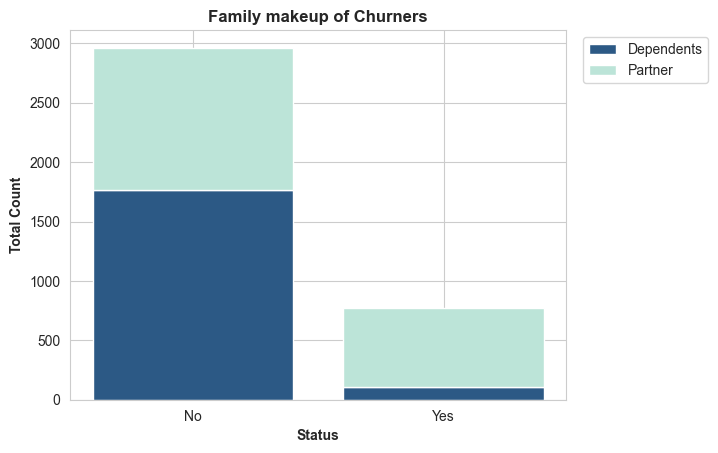

In [166]:
colors = ['#2C5985',  '#BCE4D8' ]
dependents = df_churners["Dependents"].value_counts()
partner = df_churners["Partner"].value_counts()

fig, ax = plt.subplots()
ax.bar(dependents.index, dependents.values, label="Dependents", color=colors[0])
ax.bar(partner.index, partner.values, bottom=dependents.values, label="Partner", color=colors[1])
ax.set_title("Family makeup of Churners",fontweight="bold")
ax.set_xlabel("Status",fontweight="bold")
ax.set_ylabel("Total Count",fontweight="bold")

# move legend out of the graph
plt.legend(bbox_to_anchor=(1.30,1))

plt.show()

### Correlations of all the numeric columns

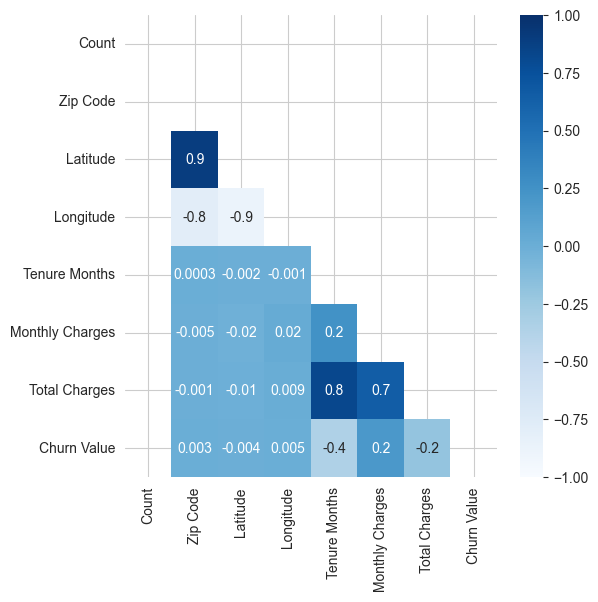

In [193]:
# Heatmap to show the correlation
plt.figure(figsize=(6,6), dpi=100)

sns.heatmap(df.corr(numeric_only=True),
           annot=True,
           cmap='Blues',
           vmin=-1,
           vmax=1,
           fmt='.1',
           mask=np.triu(df.corr(numeric_only=True)))

plt.show()

### Types of Customers who churned

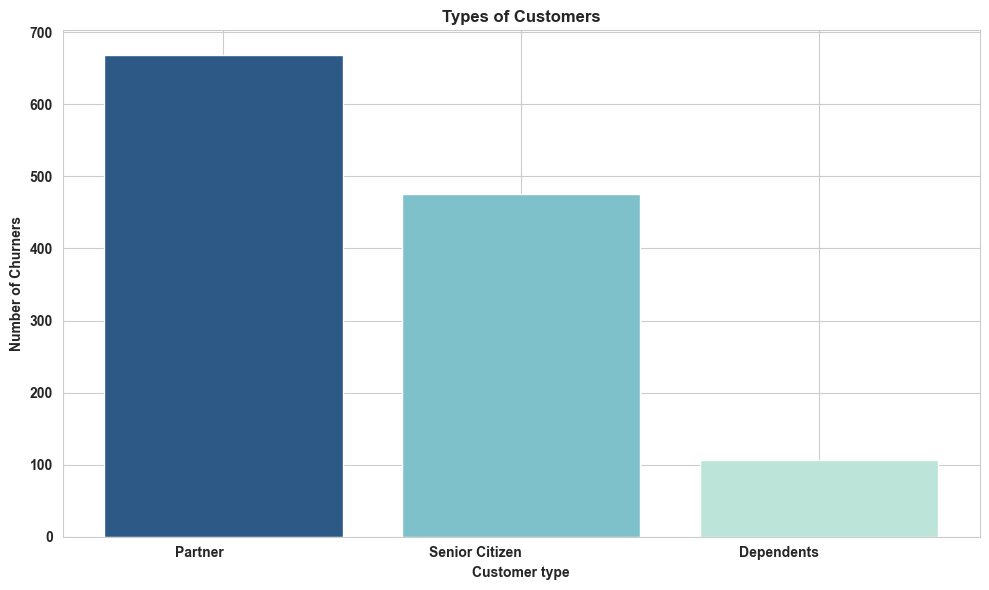

In [175]:
# Customer types who churned
colors = ['#2C5985',  '#7EC1CA','#BCE4D8' ]

cust = [ 'Partner', 'Senior Citizen','Dependents']
cust_counts = [df_churners[df_churners[cust] == 'Yes'].shape[0] for cust in cust]

plt.figure(figsize=(10, 6))
plt.bar(cust, cust_counts, color=colors)
plt.yticks(fontweight="bold")
plt.xticks(ha='right',fontweight="bold")
plt.xlabel('Customer type',fontweight="bold")
plt.ylabel('Number of Churners',fontweight="bold")
plt.title('Types of Customers',fontweight="bold")
plt.tight_layout()
plt.savefig('product_graph.png')
plt.show()



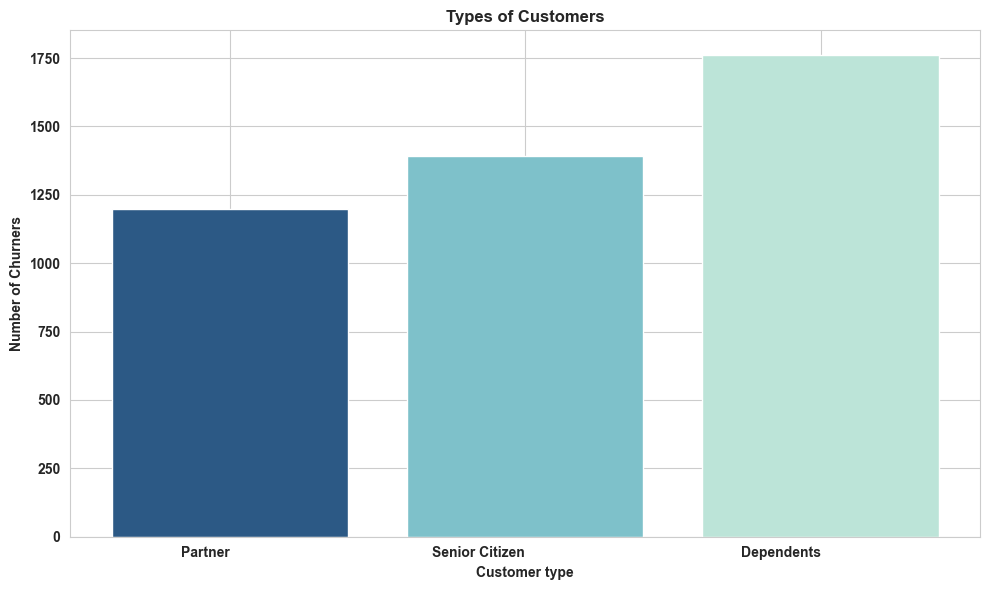

In [183]:
# Customer types who churned
colors = ['#2C5985',  '#7EC1CA','#BCE4D8' ]

cust = [ 'Partner', 'Senior Citizen','Dependents']
cust_counts = [df_churners[df_churners[cust] == 'No'].shape[0] for cust in cust]

plt.figure(figsize=(10, 6))
plt.bar(cust, cust_counts, color=colors)
plt.yticks(fontweight="bold")
plt.xticks(ha='right',fontweight="bold")
plt.xlabel('Customer type',fontweight="bold")
plt.ylabel('Number of Churners',fontweight="bold")
plt.title('Types of Customers',fontweight="bold")
plt.tight_layout()
plt.savefig('product_graph.png')
plt.show()



In [184]:
df_nonchurners.head()

,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,Senior Citizen,Partner,Dependents,Tenure Months,Phone Service,Multiple Lines,Internet Service,Online Security,Online Backup,Device Protection,Tech Support,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Reason
1869,7590-VHVEG,1,United States,California,Los Angeles,90001,"33.973616, -118.24902",33.973616,-118.249020,Female,No,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,0,NaN
1870,5575-GNVDE,1,United States,California,Los Angeles,90002,"33.949255, -118.246978",33.949255,-118.246978,Male,No,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No,0,NaN
1871,7795-CFOCW,1,United States,California,Los Angeles,90004,"34.076259, -118.310715",34.076259,-118.310715,Male,No,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,0,NaN
1872,1452-KIOVK,1,United States,California,Los Angeles,90007,"34.027337, -118.28515",34.027337,-118.285150,Male,No,No,Yes,22,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,No,0,NaN
1873,6713-OKOMC,1,United States,California,Los Angeles,90008,"34.008293, -118.346766",34.008293,-118.346766,Female,No,No,No,10,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.9,No,0,NaN


# Feature Engineering

In [35]:
df.dtypes

CustomerID            object
Count                  int64
Country               object
State                 object
City                  object
Zip Code               int64
Lat Long              object
Latitude             float64
Longitude            float64
Gender                object
Senior Citizen        object
Partner               object
Dependents            object
Tenure Months          int64
Phone Service         object
Multiple Lines        object
Internet Service      object
Online Security       object
Online Backup         object
Device Protection     object
Tech Support          object
Streaming TV          object
Streaming Movies      object
Contract              object
Paperless Billing     object
Payment Method        object
Monthly Charges      float64
Total Charges         object
Churn Label           object
Churn Value            int64
Churn Reason          object
dtype: object

In [36]:
df.head(1)

,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,Senior Citizen,Partner,Dependents,Tenure Months,Phone Service,Multiple Lines,Internet Service,Online Security,Online Backup,Device Protection,Tech Support,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Reason
0,3668-QPYBK,1,United States,California,Los Angeles,90003,"33.964131, -118.272783",33.964131,-118.272783,Male,No,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1,Competitor made better offer


In [37]:
# Convert Total charges to numeric
df['Total Charges'] = pd.to_numeric(df['Total Charges'], errors='coerce')



In [38]:
df.dtypes

CustomerID            object
Count                  int64
Country               object
State                 object
City                  object
Zip Code               int64
Lat Long              object
Latitude             float64
Longitude            float64
Gender                object
Senior Citizen        object
Partner               object
Dependents            object
Tenure Months          int64
Phone Service         object
Multiple Lines        object
Internet Service      object
Online Security       object
Online Backup         object
Device Protection     object
Tech Support          object
Streaming TV          object
Streaming Movies      object
Contract              object
Paperless Billing     object
Payment Method        object
Monthly Charges      float64
Total Charges        float64
Churn Label           object
Churn Value            int64
Churn Reason          object
dtype: object

In [39]:
df.isnull().sum()

CustomerID            0
Count                 0
Country               0
State                 0
City                  0
Zip Code              0
Lat Long              0
Latitude              0
Longitude             0
Gender                0
Senior Citizen        0
Partner               0
Dependents            0
Tenure Months         0
Phone Service         0
Multiple Lines        0
Internet Service      0
Online Security       0
Online Backup         0
Device Protection     0
Tech Support          0
Streaming TV          0
Streaming Movies      0
Contract              0
Paperless Billing     0
Payment Method        0
Monthly Charges       0
Total Charges        11
Churn Label           0
Churn Value           0
Churn Reason          0
dtype: int64

In [40]:
df.dtypes

CustomerID            object
Count                  int64
Country               object
State                 object
City                  object
Zip Code               int64
Lat Long              object
Latitude             float64
Longitude            float64
Gender                object
Senior Citizen        object
Partner               object
Dependents            object
Tenure Months          int64
Phone Service         object
Multiple Lines        object
Internet Service      object
Online Security       object
Online Backup         object
Device Protection     object
Tech Support          object
Streaming TV          object
Streaming Movies      object
Contract              object
Paperless Billing     object
Payment Method        object
Monthly Charges      float64
Total Charges        float64
Churn Label           object
Churn Value            int64
Churn Reason          object
dtype: object

In [41]:
df['Total Charges'].isnull().sum()

11

In [42]:
# drop the total charges null rows
df.dropna(axis = 0, subset = ['Total Charges'], inplace=True)

In [43]:
df['Total Charges'].isnull().sum()

0

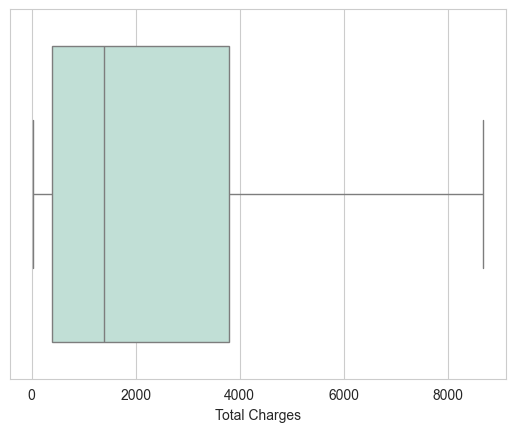

In [44]:
sns.boxplot(data = df, x = 'Total Charges')
plt.show()

In [45]:
df.describe(include='all')

,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,Senior Citizen,Partner,Dependents,Tenure Months,Phone Service,Multiple Lines,Internet Service,Online Security,Online Backup,Device Protection,Tech Support,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Reason
count,7032,7032.0,7032,7032,7032,7032.000000,7032,7032.000000,7032.000000,7032,7032,7032,7032,7032.000000,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032.000000,7032.000000,7032,7032.000000,7032
unique,7032,NaN,1,1,1129,NaN,1652,NaN,NaN,2,2,2,2,NaN,2,3,3,3,3,3,3,3,3,3,2,4,NaN,NaN,2,NaN,21
top,3668-QPYBK,NaN,United States,California,Los Angeles,NaN,"33.964131, -118.272783",NaN,NaN,Male,No,No,No,NaN,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,NaN,NaN,No,NaN,Not Churned
freq,1,NaN,7032,7032,304,NaN,5,NaN,NaN,3549,5890,3639,5412,NaN,6352,3385,3096,3497,3087,3094,3472,2809,2781,3875,4168,2365,NaN,NaN,5163,NaN,5163
mean,NaN,1.0,NaN,NaN,NaN,93523.032565,NaN,36.283307,-119.799215,NaN,NaN,NaN,NaN,32.421786,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,64.798208,2283.300441,NaN,0.265785,NaN
std,NaN,0.0,NaN,NaN,NaN,1865.515958,NaN,2.456118,2.157588,NaN,NaN,NaN,NaN,24.545260,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30.085974,2266.771362,NaN,0.441782,NaN
min,NaN,1.0,NaN,NaN,NaN,90001.000000,NaN,32.555828,-124.301372,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.250000,18.800000,NaN,0.000000,NaN
25%,NaN,1.0,NaN,NaN,NaN,92102.000000,NaN,34.030915,-121.815412,NaN,NaN,NaN,NaN,9.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35.587500,401.450000,NaN,0.000000,NaN
50%,NaN,1.0,NaN,NaN,NaN,93552.500000,NaN,36.391777,-119.735410,NaN,NaN,NaN,NaN,29.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,70.350000,1397.475000,NaN,0.000000,NaN
75%,NaN,1.0,NaN,NaN,NaN,95354.000000,NaN,38.227285,-118.043237,NaN,NaN,NaN,NaN,55.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,89.862500,3794.737500,NaN,1.000000,NaN


# Train Test Split

In [46]:
# checking for the df_copy columns
df.columns

Index(['CustomerID', 'Count', 'Country', 'State', 'City', 'Zip Code',
       'Lat Long', 'Latitude', 'Longitude', 'Gender', 'Senior Citizen',
       'Partner', 'Dependents', 'Tenure Months', 'Phone Service',
       'Multiple Lines', 'Internet Service', 'Online Security',
       'Online Backup', 'Device Protection', 'Tech Support', 'Streaming TV',
       'Streaming Movies', 'Contract', 'Paperless Billing', 'Payment Method',
       'Monthly Charges', 'Total Charges', 'Churn Label', 'Churn Value',
       'Churn Reason'],
      dtype='object')

In [47]:
# List of feature columns

features = ['Gender', 'Senior Citizen',
       'Partner', 'Dependents', 'Tenure Months', 'Phone Service',
       'Multiple Lines', 'Internet Service', 'Online Security',
       'Online Backup', 'Device Protection', 'Tech Support', 'Streaming TV',
       'Streaming Movies', 'Contract', 'Paperless Billing', 'Payment Method',
       'Monthly Charges', 'Total Charges']

In [48]:
# Create X and y. For train test split

X = df[features]
y = df['Churn Value']

In [49]:
X.head(2)

,Gender,Senior Citizen,Partner,Dependents,Tenure Months,Phone Service,Multiple Lines,Internet Service,Online Security,Online Backup,Device Protection,Tech Support,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges
0,Male,No,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15
1,Female,No,No,Yes,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65


In [50]:
# Train - Test - Split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [51]:
def feature_engineering(df):
    df = df.copy()
    
    df['Gender'] = df['Gender'].map({'Male': 1, 'Female': 0})
    df['Senior Citizen'] = df['Senior Citizen'].map({'Yes':1, 'No':0})
    df['Partner'] = df['Partner'].map({'Yes':1, 'No':0})
    df['Dependents'] = df['Dependents'].map({'Yes':1, 'No':0})
    df['Phone Service'] = df['Phone Service'].map({'Yes':1, 'No':0})
    df['Paperless Billing'] = df['Paperless Billing'].map({'Yes':1, 'No':0})
    
    df = pd.get_dummies(df, columns = ['Multiple Lines'], drop_first = True, prefix = 'ML', dtype=int)
    df = pd.get_dummies(df, columns = ['Internet Service'], drop_first = True, prefix = 'IS', dtype=int)
    df = pd.get_dummies(df, columns = ['Online Security'], drop_first = True, prefix = 'OS', dtype=int)
    df = pd.get_dummies(df, columns = ['Online Backup'], drop_first = True, prefix = 'OB', dtype=int)
    df = pd.get_dummies(df, columns = ['Device Protection'], drop_first = True, prefix = 'DP', dtype=int)
    df = pd.get_dummies(df, columns = ['Tech Support'], drop_first = True, prefix = 'TS', dtype=int)
    df = pd.get_dummies(df, columns = ['Streaming TV'], drop_first = True, prefix = 'STV', dtype=int)
    df = pd.get_dummies(df, columns = ['Streaming Movies'], drop_first = True, prefix = 'SM', dtype=int)
    df = pd.get_dummies(df, columns = ['Contract'], drop_first = True, prefix = 'Con', dtype=int)
    df = pd.get_dummies(df, columns = ['Payment Method'], drop_first = True, prefix = 'PM', dtype=int)

    #df = sm.add_constant(df)
    # scaling_features = ['Tenure Months', 'Monthly Charges', 'Total Charges']
    # st_scaler = StandardScaler()
    # st_scaler.fit(df[scaling_features])
    # scaled_features = st_scaler.transform(df[scaling_features])
    # df[['Tenure Months scaled', 'Monthly Charges scaled', 'Total Charges scaled']] = scaled_features
    # df.drop(columns = ['Tenure Months', 'Monthly Charges', 'Total Charges'], inplace = True)
    
    return df


In [52]:
# Feature Engg to the train data
X_train_fe = feature_engineering(X_train)

In [53]:
X_train_fe.head()

,Gender,Senior Citizen,Partner,Dependents,Tenure Months,Phone Service,Paperless Billing,Monthly Charges,Total Charges,ML_No phone service,ML_Yes,IS_Fiber optic,IS_No,OS_No internet service,OS_Yes,OB_No internet service,OB_Yes,DP_No internet service,DP_Yes,TS_No internet service,TS_Yes,STV_No internet service,STV_Yes,SM_No internet service,SM_Yes,Con_One year,Con_Two year,PM_Credit card (automatic),PM_Electronic check,PM_Mailed check
6030,1,0,1,0,24,1,1,93.00,2248.05,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0
3409,0,0,1,0,40,1,1,78.85,3126.85,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0
5482,1,0,1,0,4,1,0,65.60,250.10,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0
5523,0,0,0,0,4,1,0,55.50,227.35,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0
6337,0,0,1,1,64,1,0,24.90,1595.50,0,1,0,1,1,0,1,0,1,0,1,0,1,0,1,0,1,0,0,0,1


In [54]:
len(X) == len(y)

True

# Logistic Regression - Model 1

In [55]:
lr = LogisticRegression(max_iter=1500, random_state=42)

In [56]:
lr.fit(X_train_fe, y_train)

LogisticRegression(max_iter=1500, random_state=42)

In [57]:
X_train_fe[['prob_nonChurn', 'prob_Churn']] = lr.predict_proba(X_train_fe)

In [58]:
X_train_fe['y_pred'] = np.where(X_train_fe['prob_Churn']>.5, 1, 0)

In [59]:
X_train_fe.head()

,Gender,Senior Citizen,Partner,Dependents,Tenure Months,Phone Service,Paperless Billing,Monthly Charges,Total Charges,ML_No phone service,ML_Yes,IS_Fiber optic,IS_No,OS_No internet service,OS_Yes,OB_No internet service,OB_Yes,DP_No internet service,DP_Yes,TS_No internet service,TS_Yes,STV_No internet service,STV_Yes,SM_No internet service,SM_Yes,Con_One year,Con_Two year,PM_Credit card (automatic),PM_Electronic check,PM_Mailed check,prob_nonChurn,prob_Churn,y_pred
6030,1,0,1,0,24,1,1,93.00,2248.05,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0.265518,0.734482,1
3409,0,0,1,0,40,1,1,78.85,3126.85,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0.673823,0.326177,0
5482,1,0,1,0,4,1,0,65.60,250.10,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0.412096,0.587904,1
5523,0,0,0,0,4,1,0,55.50,227.35,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0.644950,0.355050,0
6337,0,0,1,1,64,1,0,24.90,1595.50,0,1,0,1,1,0,1,0,1,0,1,0,1,0,1,0,1,0,0,0,1,0.998043,0.001957,0


In [60]:
## The 'metrics' module from sklearn covers all of them (and more!) So we can use a function like the one below

def get_results(actual, predicted):
    print("The confusion matrix for the Churning predictions is:")
    print(metrics.confusion_matrix(predicted, actual), "\n")
    print(f'The accuracy of the Churning prediction model is: {metrics.accuracy_score(predicted, actual)}')
    print(f'The recall of the Churning prediction model is: {metrics.recall_score(predicted, actual)}')
    print(f'The precision of the Churning prediction model is: {metrics.precision_score(predicted, actual)}')
    print(f'The F1-score of the Churning prediction model is: {metrics.f1_score(predicted, actual)}')

In [61]:
get_results(y_train, X_train_fe['y_pred'])

The confusion matrix for the Churning predictions is:
[[3730  630]
 [ 421  844]] 

The accuracy of the Churning prediction model is: 0.8131555555555555
The recall of the Churning prediction model is: 0.6671936758893281
The precision of the Churning prediction model is: 0.5725915875169606
The F1-score of the Churning prediction model is: 0.6162833150784958


In [62]:
# Check the classification report
print(metrics.classification_report(y_train, X_train_fe['y_pred']))

              precision    recall  f1-score   support

           0       0.86      0.90      0.88      4151
           1       0.67      0.57      0.62      1474

    accuracy                           0.81      5625
   macro avg       0.76      0.74      0.75      5625
weighted avg       0.81      0.81      0.81      5625



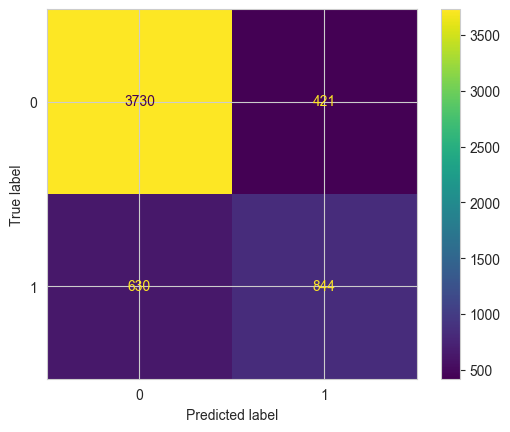

In [63]:
conf = metrics.confusion_matrix(y_train, X_train_fe['y_pred'])
metrics.ConfusionMatrixDisplay(conf).plot()
plt.show()

In [64]:
# Feature Engg to the test data
X_test_fe = feature_engineering(X_test)

In [65]:
X_test_fe[['prob_nonChurn', 'prob_Churn']] = lr.predict_proba(X_test_fe)

In [66]:
X_test_fe['y_pred'] = np.where(X_test_fe['prob_Churn']>.5, 1, 0)

In [67]:
X_test_fe.head()

,Gender,Senior Citizen,Partner,Dependents,Tenure Months,Phone Service,Paperless Billing,Monthly Charges,Total Charges,ML_No phone service,ML_Yes,IS_Fiber optic,IS_No,OS_No internet service,OS_Yes,OB_No internet service,OB_Yes,DP_No internet service,DP_Yes,TS_No internet service,TS_Yes,STV_No internet service,STV_Yes,SM_No internet service,SM_Yes,Con_One year,Con_Two year,PM_Credit card (automatic),PM_Electronic check,PM_Mailed check,prob_nonChurn,prob_Churn,y_pred
2478,0,0,1,0,42,1,0,25.25,1108.20,0,1,0,1,1,0,1,0,1,0,1,0,1,0,1,0,0,1,0,1,0,0.981003,0.018997,0
6783,1,0,0,0,43,0,0,44.15,1931.30,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,1,0,0,1,0,0.919979,0.080021,0
6125,0,0,0,0,27,1,1,89.20,2383.60,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,1,0,0.522664,0.477336,0
3052,1,0,0,0,65,1,1,19.55,1218.65,0,0,0,1,1,0,1,0,1,0,1,0,1,0,1,0,0,1,1,0,0,0.997407,0.002593,0
4097,0,0,0,0,29,1,1,71.00,2080.10,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,1,0,0,0.794259,0.205741,0


In [68]:
get_results(y_test, X_test_fe['y_pred'])

The confusion matrix for the Churning predictions is:
[[915 166]
 [ 97 229]] 

The accuracy of the Churning prediction model is: 0.8130774697938877
The recall of the Churning prediction model is: 0.7024539877300614
The precision of the Churning prediction model is: 0.579746835443038
The F1-score of the Churning prediction model is: 0.6352288488210819


In [69]:
print(metrics.classification_report(y_test, X_test_fe['y_pred']))

              precision    recall  f1-score   support

           0       0.85      0.90      0.87      1012
           1       0.70      0.58      0.64       395

    accuracy                           0.81      1407
   macro avg       0.77      0.74      0.75      1407
weighted avg       0.81      0.81      0.81      1407



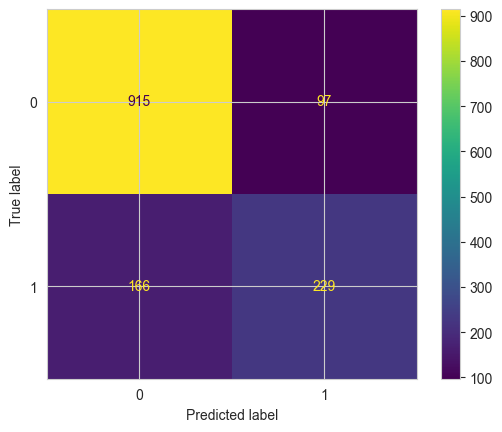

In [70]:
conf = metrics.confusion_matrix(y_test, X_test_fe['y_pred'])
metrics.ConfusionMatrixDisplay(conf).plot()
plt.show()

# Variance Inflation Factor - Model 2

In [71]:
from statsmodels.stats.outliers_influence import variance_inflation_factor # a module to evaluate the (VIF)

cols = ['Gender', 'Senior Citizen', 'Partner', 'Dependents',
       'Tenure Months', 'Phone Service', 'Paperless Billing',
       'Monthly Charges', 'Total Charges', 'ML_No phone service', 'ML_Yes',
       'IS_Fiber optic', 'IS_No', 'OS_No internet service', 'OS_Yes',
       'OB_No internet service', 'OB_Yes', 'DP_No internet service', 'DP_Yes',
       'TS_No internet service', 'TS_Yes', 'STV_No internet service',
       'STV_Yes', 'SM_No internet service', 'SM_Yes', 'Con_One year',
       'Con_Two year', 'PM_Credit card (automatic)', 'PM_Electronic check',
       'PM_Mailed check']

## We can create an indexed list (a series) where we list the VIF of each of the columns. Note the use of '.shape' in the second part of the loop
pd.Series([variance_inflation_factor(X_train_fe[cols].values, i) for i in range(X_train_fe[cols].shape[1])], index = X_train_fe[cols].columns)


C:\Users\chira\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\stats\outliers_influence.py:198: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)
C:\Users\chira\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\stats\outliers_influence.py:198: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)
C:\Users\chira\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\stats\outliers_influence.py:198: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)
C:\Users\chira\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\stats\outliers_influence.py:198: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)
C:\Users\chira\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\stats\outliers_influence.py:198: RuntimeWarning: divide by zero encountered

Gender                           1.002403
Senior Citizen                   1.132569
Partner                          1.350545
Dependents                       1.252100
Tenure Months                    7.522794
Phone Service                 1761.569062
Paperless Billing                1.209813
Monthly Charges                865.188065
Total Charges                   10.650613
ML_No phone service             61.693041
ML_Yes                           7.280608
IS_Fiber optic                 147.715716
IS_No                                 inf
OS_No internet service                inf
OS_Yes                           6.320448
OB_No internet service                inf
OB_Yes                           6.720425
DP_No internet service                inf
DP_Yes                           6.923073
TS_No internet service                inf
TS_Yes                           6.443732
STV_No internet service               inf
STV_Yes                         23.905535
SM_No internet service            

In [72]:
## This a piece of code from stats.stackexchange.com
## It runs the model with all the variables.
## If any of them have a higher VIF than 5, it drops the max. 
## Then it keeps going until none of them have a higher VIF than 5.
## This leaves us with a nice set of features with no collineraity

def calculate_vif(X, thresh = 5.0):
    variables = list(range(X.shape[1]))
    dropped = True
    while dropped:
        dropped = False
        # this bit uses list comprehension to gather all the VIF values of the different variables
        vif = [variance_inflation_factor(X.iloc[:, variables].values, ix)
               for ix in range(X.iloc[:, variables].shape[1])]
        
        maxloc = vif.index(max(vif)) # getting the index of the highest VIF value
        if max(vif) > thresh:
            print('dropping \'' + X.iloc[:, variables].columns[maxloc] +
                  '\' at index: ' + str(maxloc))
            del variables[maxloc] # we delete the highest VIF value on condition that it's higher than the threshold
            dropped = True # if we deleted anything, we set the 'dropped' value to True to stay in the while loop

    print('Remaining variables:')
    print(X.columns[variables]) # finally, we print the variables that are still in our set
    return X.iloc[:, variables] # and return our X cut down to the remaining variables

In [73]:
calculate_vif(X_train_fe[['Gender', 'Senior Citizen', 'Partner', 'Dependents',
       'Tenure Months', 'Phone Service', 'Paperless Billing',
       'Monthly Charges', 'Total Charges', 'ML_No phone service', 'ML_Yes',
       'IS_Fiber optic', 'IS_No', 'OS_No internet service', 'OS_Yes',
       'OB_No internet service', 'OB_Yes', 'DP_No internet service', 'DP_Yes',
       'TS_No internet service', 'TS_Yes', 'STV_No internet service',
       'STV_Yes', 'SM_No internet service', 'SM_Yes', 'Con_One year',
       'Con_Two year', 'PM_Credit card (automatic)', 'PM_Electronic check',
       'PM_Mailed check']])

C:\Users\chira\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\stats\outliers_influence.py:198: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


dropping 'IS_No' at index: 12
dropping 'OS_No internet service' at index: 12
dropping 'OB_No internet service' at index: 13
dropping 'DP_No internet service' at index: 14
dropping 'TS_No internet service' at index: 15
dropping 'STV_No internet service' at index: 16
dropping 'Phone Service' at index: 5
dropping 'Monthly Charges' at index: 6
dropping 'Total Charges' at index: 6
dropping 'Tenure Months' at index: 4
Remaining variables:
Index(['Gender', 'Senior Citizen', 'Partner', 'Dependents',
       'Paperless Billing', 'ML_No phone service', 'ML_Yes', 'IS_Fiber optic',
       'OS_Yes', 'OB_Yes', 'DP_Yes', 'TS_Yes', 'STV_Yes',
       'SM_No internet service', 'SM_Yes', 'Con_One year', 'Con_Two year',
       'PM_Credit card (automatic)', 'PM_Electronic check', 'PM_Mailed check'],
      dtype='object')


,Gender,Senior Citizen,Partner,Dependents,Paperless Billing,ML_No phone service,ML_Yes,IS_Fiber optic,OS_Yes,OB_Yes,DP_Yes,TS_Yes,STV_Yes,SM_No internet service,SM_Yes,Con_One year,Con_Two year,PM_Credit card (automatic),PM_Electronic check,PM_Mailed check
6030,1,0,1,0,1,0,1,1,0,0,0,0,1,0,1,0,0,0,1,0
3409,0,0,1,0,1,0,1,1,0,0,0,1,0,0,0,0,0,1,0,0
5482,1,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,1,0
5523,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0
6337,0,0,1,1,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3777,0,1,0,1,1,0,1,1,0,0,0,1,1,0,1,0,0,0,1,0
5199,0,1,0,0,1,0,1,0,0,1,1,1,1,0,0,0,1,0,0,0
5234,1,0,0,0,1,0,1,1,0,1,0,1,1,0,1,0,0,0,1,0
5398,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1


In [74]:
vif_features = X_train_fe[['Gender', 'Senior Citizen', 'Partner', 'Dependents',
       'Paperless Billing', 'ML_No phone service', 'ML_Yes', 'IS_Fiber optic',
       'OS_Yes', 'OB_Yes', 'DP_Yes', 'TS_Yes', 'STV_Yes',
       'SM_No internet service', 'SM_Yes', 'Con_One year', 'Con_Two year',
       'PM_Credit card (automatic)', 'PM_Electronic check', 'PM_Mailed check']].copy()

vif_features_test = X_test_fe[['Gender', 'Senior Citizen', 'Partner', 'Dependents',
       'Paperless Billing', 'ML_No phone service', 'ML_Yes', 'IS_Fiber optic',
       'OS_Yes', 'OB_Yes', 'DP_Yes', 'TS_Yes', 'STV_Yes',
       'SM_No internet service', 'SM_Yes', 'Con_One year', 'Con_Two year',
       'PM_Credit card (automatic)', 'PM_Electronic check', 'PM_Mailed check']].copy()

In [75]:
lr2 = LogisticRegression(max_iter=1050, random_state=42)

In [76]:
lr2.fit(vif_features, y_train)

LogisticRegression(max_iter=1050, random_state=42)

In [77]:
vif_features[['prob_nonChurn', 'prob_Churn']] = lr2.predict_proba(vif_features)

In [78]:
vif_features['y_pred'] = np.where(vif_features['prob_Churn']>.5, 1, 0)

In [79]:
vif_features.head()

,Gender,Senior Citizen,Partner,Dependents,Paperless Billing,ML_No phone service,ML_Yes,IS_Fiber optic,OS_Yes,OB_Yes,DP_Yes,TS_Yes,STV_Yes,SM_No internet service,SM_Yes,Con_One year,Con_Two year,PM_Credit card (automatic),PM_Electronic check,PM_Mailed check,prob_nonChurn,prob_Churn,y_pred
6030,1,0,1,0,1,0,1,1,0,0,0,0,1,0,1,0,0,0,1,0,0.269454,0.730546,1
3409,0,0,1,0,1,0,1,1,0,0,0,1,0,0,0,0,0,1,0,0,0.540158,0.459842,0
5482,1,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,1,0,0.582061,0.417939,0
5523,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0.691133,0.308867,0
6337,0,0,1,1,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,1,0.983383,0.016617,0


In [80]:
get_results(y_train, vif_features['y_pred'])

The confusion matrix for the Churning predictions is:
[[3668  655]
 [ 483  819]] 

The accuracy of the Churning prediction model is: 0.7976888888888889
The recall of the Churning prediction model is: 0.6290322580645161
The precision of the Churning prediction model is: 0.5556309362279511
The F1-score of the Churning prediction model is: 0.590057636887608


In [81]:
print(metrics.classification_report(y_train, vif_features['y_pred']))

              precision    recall  f1-score   support

           0       0.85      0.88      0.87      4151
           1       0.63      0.56      0.59      1474

    accuracy                           0.80      5625
   macro avg       0.74      0.72      0.73      5625
weighted avg       0.79      0.80      0.79      5625



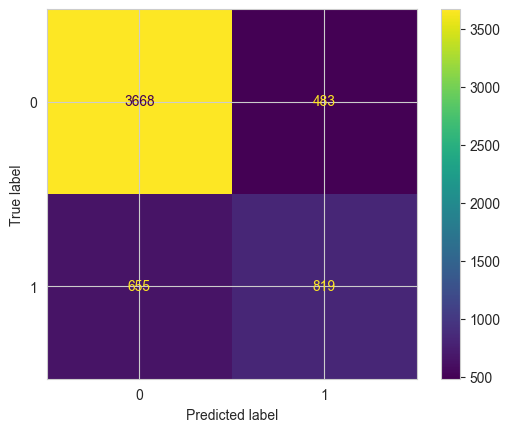

In [82]:
conf = metrics.confusion_matrix(y_train, vif_features['y_pred'])
metrics.ConfusionMatrixDisplay(conf).plot()
plt.show()

## Test data VIF

In [83]:
vif_features_test[['prob_nonChurn', 'prob_Churn']] = lr2.predict_proba(vif_features_test)

In [84]:
vif_features_test['y_pred'] = np.where(vif_features_test['prob_Churn']>.5, 1, 0)

In [85]:
vif_features_test.head()

,Gender,Senior Citizen,Partner,Dependents,Paperless Billing,ML_No phone service,ML_Yes,IS_Fiber optic,OS_Yes,OB_Yes,DP_Yes,TS_Yes,STV_Yes,SM_No internet service,SM_Yes,Con_One year,Con_Two year,PM_Credit card (automatic),PM_Electronic check,PM_Mailed check,prob_nonChurn,prob_Churn,y_pred
2478,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,1,0,0.969905,0.030095,0
6783,1,0,0,0,0,1,0,0,0,0,1,1,0,0,1,1,0,0,1,0,0.848239,0.151761,0
6125,0,0,0,0,1,0,0,1,0,0,1,1,0,0,1,0,0,0,1,0,0.398273,0.601727,1
3052,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0,0.977521,0.022479,0
4097,0,0,0,0,1,0,1,0,0,0,0,0,1,0,1,1,0,1,0,0,0.824743,0.175257,0


In [86]:
get_results(y_test, vif_features_test['y_pred'])

The confusion matrix for the Churning predictions is:
[[877 165]
 [135 230]] 

The accuracy of the Churning prediction model is: 0.7867803837953091
The recall of the Churning prediction model is: 0.6301369863013698
The precision of the Churning prediction model is: 0.5822784810126582
The F1-score of the Churning prediction model is: 0.6052631578947368


In [87]:
print(metrics.classification_report(y_test, vif_features_test['y_pred']))

              precision    recall  f1-score   support

           0       0.84      0.87      0.85      1012
           1       0.63      0.58      0.61       395

    accuracy                           0.79      1407
   macro avg       0.74      0.72      0.73      1407
weighted avg       0.78      0.79      0.78      1407



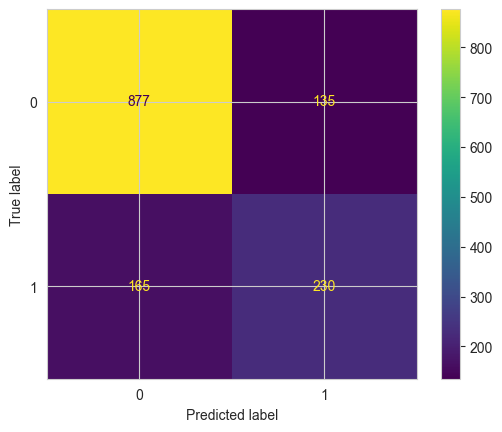

In [88]:
conf = metrics.confusion_matrix(y_test, vif_features_test['y_pred'])
metrics.ConfusionMatrixDisplay(conf).plot()
plt.show()

# Stepwise - Model 3

In [89]:
def stepwise_selection(X, y, threshold_in = 0.01, threshold_out = 0.05, verbose = True):
    # The function is checking for p-values (whether features are statistically significant) - lower is better
    included = [] # this is going to be the list of features we keep
    while True:
        changed = False
        # forward step
        excluded = list(set(X.columns) - set(included))
        new_pval = pd.Series(index = excluded, dtype = 'float64')
        for new_column in excluded:
            model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included + [new_column]]))).fit()
            new_pval[new_column] = model.pvalues[new_column]
        best_pval = new_pval.min()
        # we add the feature with the lowest (best) p-value under the threshold to our 'included' list
        if best_pval < threshold_in:
            best_feature = new_pval.idxmin()
            included.append(best_feature)
            changed = True
            if verbose:
                print('Add  {:30} with p-value {:.6}'.format(best_feature, best_pval)) # specifying the verbose text


       
        # backward step: removing features if new features added to the list make them statistically insignificant
        model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included]))).fit()
        
        # use all coefs except intercept
        pvalues = model.pvalues.iloc[1:]
        worst_pval = pvalues.max() # null if pvalues is empty
        # if the p-value exceeds the upper threshold, the feature will be dropped from the 'included' list
        if worst_pval > threshold_out:
            changed = True
            worst_feature = pvalues.idxmax()
            included.remove(worst_feature)
            if verbose:
                print('Drop {:30} with p-value {:.6}'.format(worst_feature, worst_pval))
        if not changed:
            break
    return included

In [90]:
X_train_fe.columns

Index(['Gender', 'Senior Citizen', 'Partner', 'Dependents', 'Tenure Months',
       'Phone Service', 'Paperless Billing', 'Monthly Charges',
       'Total Charges', 'ML_No phone service', 'ML_Yes', 'IS_Fiber optic',
       'IS_No', 'OS_No internet service', 'OS_Yes', 'OB_No internet service',
       'OB_Yes', 'DP_No internet service', 'DP_Yes', 'TS_No internet service',
       'TS_Yes', 'STV_No internet service', 'STV_Yes',
       'SM_No internet service', 'SM_Yes', 'Con_One year', 'Con_Two year',
       'PM_Credit card (automatic)', 'PM_Electronic check', 'PM_Mailed check',
       'prob_nonChurn', 'prob_Churn', 'y_pred'],
      dtype='object')

In [91]:
resultSW = stepwise_selection(X_train_fe[['Gender', 'Senior Citizen', 'Partner', 'Dependents',
       'Tenure Months', 'Phone Service', 'Paperless Billing',
       'Monthly Charges', 'Total Charges', 'ML_No phone service', 'ML_Yes',
       'IS_Fiber optic', 'IS_No', 'OS_No internet service', 'OS_Yes',
       'OB_No internet service', 'OB_Yes', 'DP_No internet service', 'DP_Yes',
       'TS_No internet service', 'TS_Yes', 'STV_No internet service',
       'STV_Yes', 'SM_No internet service', 'SM_Yes', 'Con_One year',
       'Con_Two year', 'PM_Credit card (automatic)', 'PM_Electronic check',
       'PM_Mailed check']], y_train, threshold_in = 0.01, threshold_out = 0.05, verbose = True)

#resultSW = stepwise_selection(X_train_fe[features], y_train, threshold_in = 0.01, threshold_out = 0.05, verbose = True)




print('resulting features:')
print(resultSW)

Add  Tenure Months                  with p-value 5.15526e-162
Add  IS_Fiber optic                 with p-value 8.59032e-147
Add  Dependents                     with p-value 2.55702e-37
Add  PM_Electronic check            with p-value 4.08944e-26
Add  Con_One year                   with p-value 5.3255e-12
Add  Paperless Billing              with p-value 2.24452e-11
Add  Con_Two year                   with p-value 4.3162e-08
Add  DP_No internet service         with p-value 3.06593e-05
Add  Total Charges                  with p-value 1.90286e-11
Add  OB_No internet service         with p-value 9.85322e-12
Add  SM_No internet service         with p-value 9.85322e-12
Add  STV_No internet service        with p-value 9.85322e-12
Add  IS_No                          with p-value 9.85322e-12
Add  OS_No internet service         with p-value 9.85322e-12
Add  TS_No internet service         with p-value 9.85322e-12
Add  OS_Yes                         with p-value 8.6525e-07
Add  SM_Yes              

In [92]:
stepwise_features = X_train_fe[['Tenure Months', 'IS_Fiber optic', 'Dependents', 'PM_Electronic check', 
                     'Con_One year', 'Paperless Billing', 'Con_Two year', 'IS_No', 'Total Charges', 
                     'OB_No internet service', 'DP_No internet service', 'STV_No internet service', 
                     'OS_No internet service', 'SM_No internet service', 'TS_No internet service', 
                     'OS_Yes', 'SM_Yes', 'ML_Yes', 'Partner', 'TS_Yes', 'STV_Yes']].copy()

stepwise_features_test = X_test_fe[['Tenure Months', 'IS_Fiber optic', 'Dependents', 'PM_Electronic check', 
                     'Con_One year', 'Paperless Billing', 'Con_Two year', 'IS_No', 'Total Charges', 
                     'OB_No internet service', 'DP_No internet service', 'STV_No internet service', 
                     'OS_No internet service', 'SM_No internet service', 'TS_No internet service', 
                     'OS_Yes', 'SM_Yes', 'ML_Yes', 'Partner', 'TS_Yes', 'STV_Yes']].copy()

In [93]:
lr3 = LogisticRegression(max_iter=1050, random_state=42)

In [94]:
lr3.fit(stepwise_features, y_train)

LogisticRegression(max_iter=1050, random_state=42)

In [95]:
stepwise_features[['prob_nonChurn', 'prob_Churn']] = lr3.predict_proba(stepwise_features)

In [96]:
stepwise_features['y_pred'] = np.where(stepwise_features['prob_Churn']>.5, 1, 0)

In [97]:
stepwise_features.head()

,Tenure Months,IS_Fiber optic,Dependents,PM_Electronic check,Con_One year,Paperless Billing,Con_Two year,IS_No,Total Charges,OB_No internet service,DP_No internet service,STV_No internet service,OS_No internet service,SM_No internet service,TS_No internet service,OS_Yes,SM_Yes,ML_Yes,Partner,TS_Yes,STV_Yes,prob_nonChurn,prob_Churn,y_pred
6030,24,1,0,1,0,1,0,0,2248.05,0,0,0,0,0,0,0,1,1,1,0,1,0.259578,0.740422,1
3409,40,1,0,0,0,1,0,0,3126.85,0,0,0,0,0,0,0,0,1,1,1,0,0.661271,0.338729,0
5482,4,0,0,1,0,0,0,0,250.10,0,0,0,0,0,0,0,0,1,1,0,1,0.379285,0.620715,1
5523,4,0,0,0,0,0,0,0,227.35,0,0,0,0,0,0,0,0,0,0,0,1,0.591128,0.408872,0
6337,64,0,1,0,1,0,0,1,1595.50,1,1,1,1,1,1,0,0,1,1,0,0,0.997852,0.002148,0


In [98]:
get_results(y_train, stepwise_features['y_pred'])

The confusion matrix for the Churning predictions is:
[[3728  638]
 [ 423  836]] 

The accuracy of the Churning prediction model is: 0.8113777777777778
The recall of the Churning prediction model is: 0.6640190627482129
The precision of the Churning prediction model is: 0.5671641791044776
The F1-score of the Churning prediction model is: 0.6117819246249543


In [99]:
print(metrics.classification_report(y_train, stepwise_features['y_pred']))

              precision    recall  f1-score   support

           0       0.85      0.90      0.88      4151
           1       0.66      0.57      0.61      1474

    accuracy                           0.81      5625
   macro avg       0.76      0.73      0.74      5625
weighted avg       0.80      0.81      0.81      5625



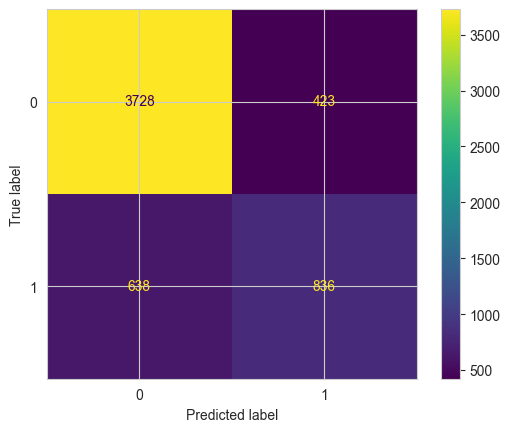

In [100]:
conf = metrics.confusion_matrix(y_train, stepwise_features['y_pred'])
metrics.ConfusionMatrixDisplay(conf).plot()
plt.show()

## Test data Stepwise

In [101]:
stepwise_features_test[['prob_nonChurn', 'prob_Churn']] = lr3.predict_proba(stepwise_features_test)

In [102]:
stepwise_features_test['y_pred'] = np.where(stepwise_features_test['prob_Churn']>.5, 1, 0)

In [103]:
stepwise_features_test.head()

,Tenure Months,IS_Fiber optic,Dependents,PM_Electronic check,Con_One year,Paperless Billing,Con_Two year,IS_No,Total Charges,OB_No internet service,DP_No internet service,STV_No internet service,OS_No internet service,SM_No internet service,TS_No internet service,OS_Yes,SM_Yes,ML_Yes,Partner,TS_Yes,STV_Yes,prob_nonChurn,prob_Churn,y_pred
2478,42,0,0,1,0,0,1,1,1108.20,1,1,1,1,1,1,0,0,1,1,0,0,0.979095,0.020905,0
6783,43,0,0,1,1,0,0,0,1931.30,0,0,0,0,0,0,0,1,0,0,1,0,0.938024,0.061976,0
6125,27,1,0,1,0,1,0,0,2383.60,0,0,0,0,0,0,0,1,0,0,1,0,0.514185,0.485815,0
3052,65,0,0,0,0,1,1,1,1218.65,1,1,1,1,1,1,0,0,0,0,0,0,0.996331,0.003669,0
4097,29,0,0,0,1,1,0,0,2080.10,0,0,0,0,0,0,0,1,1,0,0,1,0.761841,0.238159,0


In [104]:
get_results(y_test, stepwise_features_test['y_pred'])

The confusion matrix for the Churning predictions is:
[[910 166]
 [102 229]] 

The accuracy of the Churning prediction model is: 0.8095238095238095
The recall of the Churning prediction model is: 0.6918429003021148
The precision of the Churning prediction model is: 0.579746835443038
The F1-score of the Churning prediction model is: 0.6308539944903582


In [105]:
print(metrics.classification_report(y_test, stepwise_features_test['y_pred']))

              precision    recall  f1-score   support

           0       0.85      0.90      0.87      1012
           1       0.69      0.58      0.63       395

    accuracy                           0.81      1407
   macro avg       0.77      0.74      0.75      1407
weighted avg       0.80      0.81      0.80      1407



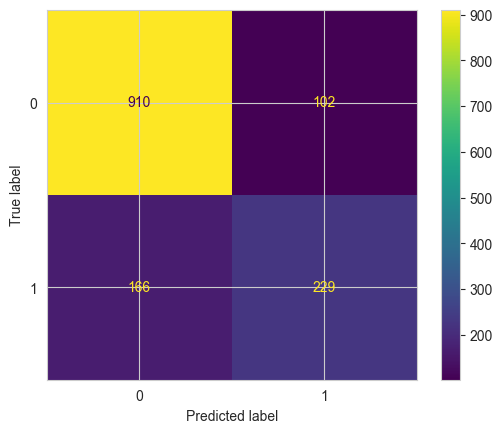

In [106]:
conf = metrics.confusion_matrix(y_test, stepwise_features_test['y_pred'])
metrics.ConfusionMatrixDisplay(conf).plot()
plt.show()

# **Top 500 Customers likely to Churn**

In [177]:
# Dataframe consisting only the customers who have not churned yet
df_nonchurners.head()

,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,Senior Citizen,Partner,Dependents,Tenure Months,Phone Service,Multiple Lines,Internet Service,Online Security,Online Backup,Device Protection,Tech Support,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Reason
1869,7590-VHVEG,1,United States,California,Los Angeles,90001,"33.973616, -118.24902",33.973616,-118.249020,Female,No,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,0,NaN
1870,5575-GNVDE,1,United States,California,Los Angeles,90002,"33.949255, -118.246978",33.949255,-118.246978,Male,No,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No,0,NaN
1871,7795-CFOCW,1,United States,California,Los Angeles,90004,"34.076259, -118.310715",34.076259,-118.310715,Male,No,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,0,NaN
1872,1452-KIOVK,1,United States,California,Los Angeles,90007,"34.027337, -118.28515",34.027337,-118.285150,Male,No,No,Yes,22,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,No,0,NaN
1873,6713-OKOMC,1,United States,California,Los Angeles,90008,"34.008293, -118.346766",34.008293,-118.346766,Female,No,No,No,10,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.9,No,0,NaN


In [176]:
# Checking the nulls for the Total Charges column
rows_with_nan = df_nonchurners[(df_nonchurners['Total Charges'] == ' ')]
rows_with_nan 

,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,Senior Citizen,Partner,Dependents,Tenure Months,Phone Service,Multiple Lines,Internet Service,Online Security,Online Backup,Device Protection,Tech Support,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Reason


In [179]:
# Checking the shape of the dataframe
df_nonchurners.shape

(5163, 31)

In [180]:
# Delete rows with space as a value in any column
df_nonchurners = df_nonchurners[df_nonchurners['Total Charges'].astype(str).str.strip() != '']

In [111]:
# Checking the shape of the dataframe after deleting the data
df_nonchurners.shape

(5163, 31)

In [181]:
# Checking the values for Total Charges column
df_nonchurners['Total Charges'].value_counts()

Total Charges
19.75      7
19.65      6
19.55      6
20.05      6
20.45      5
          ..
2117.20    1
203.95     1
6849.40    1
85.50      1
6844.50    1
Name: count, Length: 4965, dtype: int64

In [113]:
# Creating a list of feature engineering columns
fe_cols = ['CustomerID','Gender', 'Senior Citizen',
       'Partner', 'Dependents', 'Tenure Months', 'Phone Service',
       'Multiple Lines', 'Internet Service', 'Online Security',
       'Online Backup', 'Device Protection', 'Tech Support', 'Streaming TV',
       'Streaming Movies', 'Contract', 'Paperless Billing', 'Payment Method',
       'Monthly Charges', 'Total Charges']

In [114]:
# Apply feature engineering to this dataset
X_df_nonchurners = df_nonchurners[fe_cols]
df_nonchurners_fe = feature_engineering(X_df_nonchurners)
df_nonchurners_fe.head()


,CustomerID,Gender,Senior Citizen,Partner,Dependents,Tenure Months,Phone Service,Paperless Billing,Monthly Charges,Total Charges,ML_No phone service,ML_Yes,IS_Fiber optic,IS_No,OS_No internet service,OS_Yes,OB_No internet service,OB_Yes,DP_No internet service,DP_Yes,TS_No internet service,TS_Yes,STV_No internet service,STV_Yes,SM_No internet service,SM_Yes,Con_One year,Con_Two year,PM_Credit card (automatic),PM_Electronic check,PM_Mailed check
1869,7590-VHVEG,0,0,1,0,1,0,1,29.85,29.85,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0
1870,5575-GNVDE,1,0,0,0,34,1,0,56.95,1889.5,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1
1871,7795-CFOCW,1,0,0,0,45,0,0,42.30,1840.75,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0
1872,1452-KIOVK,1,0,0,1,22,1,1,89.10,1949.4,0,1,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0
1873,6713-OKOMC,0,0,0,0,10,0,0,29.75,301.9,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [115]:
# Convert Total charges to numeric data type
df_nonchurners_fe['Total Charges'] = pd.to_numeric(df_nonchurners_fe['Total Charges'], errors='coerce')

In [116]:
# Checking the datatypes for the columns in dataframe
df_nonchurners_fe.dtypes

CustomerID                     object
Gender                          int64
Senior Citizen                  int64
Partner                         int64
Dependents                      int64
Tenure Months                   int64
Phone Service                   int64
Paperless Billing               int64
Monthly Charges               float64
Total Charges                 float64
ML_No phone service             int32
ML_Yes                          int32
IS_Fiber optic                  int32
IS_No                           int32
OS_No internet service          int32
OS_Yes                          int32
OB_No internet service          int32
OB_Yes                          int32
DP_No internet service          int32
DP_Yes                          int32
TS_No internet service          int32
TS_Yes                          int32
STV_No internet service         int32
STV_Yes                         int32
SM_No internet service          int32
SM_Yes                          int32
Con_One year

In [117]:
# Predicting the probabilities from the chosen Model 3
churn_prob = lr3.predict_proba(df_nonchurners_fe[['Tenure Months', 'IS_Fiber optic', 'Dependents', 'PM_Electronic check', 
                     'Con_One year', 'Paperless Billing', 'Con_Two year', 'IS_No', 'Total Charges', 
                     'OB_No internet service', 'DP_No internet service', 'STV_No internet service', 
                     'OS_No internet service', 'SM_No internet service', 'TS_No internet service', 
                     'OS_Yes', 'SM_Yes', 'ML_Yes', 'Partner', 'TS_Yes', 'STV_Yes']])[:, 1]

# Combine the customer ID and churn probability into a DataFrame
cust_churn_prob = pd.DataFrame({'CustomerID': df_nonchurners_fe['CustomerID'], 'churn_prob': churn_prob})

# Sort the customers in decreasing order of churn probability and select the top 500
top_500_cust = cust_churn_prob.sort_values(by='churn_prob', ascending=False).head(500)
top_500_cust.head()


,CustomerID,churn_prob
3732,4927-WWOOZ,0.821366
4624,3489-HHPFY,0.819792
3712,8622-ZLFKO,0.814850
2567,6630-UJZMY,0.809757
4198,5150-ITWWB,0.803182


In [118]:
# Exporting the top 500 customer list in a .csv file
top_500_cust.to_csv('top_500_cust.csv')

# **Remaining customers likely to Churn**

In [119]:
# Sort the customers in decreasing order of churn probability and select the customers beyond 500
cust_remaining = cust_churn_prob.sort_values(by='churn_prob', ascending=False).iloc[500:]
cust_remaining.head()

,CustomerID,churn_prob
6214,0082-LDZUE,0.509902
3246,3961-SXAXY,0.509884
6189,9214-EKVXR,0.509881
3199,6650-VJONK,0.509870
6771,3588-WSTTJ,0.509278


In [120]:
# List of remaining customers beyond 500 and exporting them to csv file
cust_remaining.to_csv('customers_remaining.csv')